### Importing necessary Libraries

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math


#### Importing the Black & White Image

In [4]:
img = Image.open("treeBW.png")
img = img.convert("L") # If image is not in gray scale, the converting to gray scale 

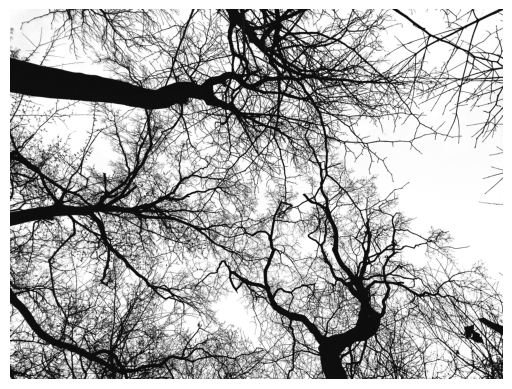

In [5]:
plt.imshow(img, cmap="gray")
plt.axis("off")  
plt.show()

##### Displaying the size of Image

In [6]:
W, H = img.size
print(f"Width: {W}, Height: {H}")

Width: 1920, Height: 1440


In [7]:
plainText = input("Enter some plain text which you want to encrypt: ")
plainText += "[END]"
plainText = plainText.encode("ascii")

msgBits = ''.join([format(byte, "08b") for byte in plainText])

In [8]:
imgArray = np.array(img)

flattenImg = imgArray.flatten()

for idx, bit in enumerate(msgBits):
    if idx >= len(flattenImg):
        print("Message too long for the image!")
        break
    val = flattenImg[idx]
    binaryValue = bin(val)[:-1] + bit
    flattenImg[idx] = int(binaryValue, 2)

imgArray = flattenImg.reshape((H, W))

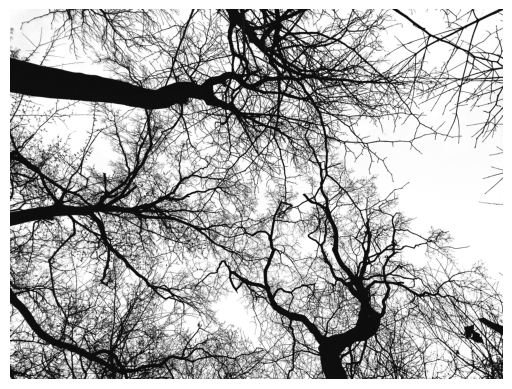

In [9]:
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [11]:
img = Image.fromarray(imgArray.astype(np.uint8))  
img.save("modifiedTree.png")

### Extracting plain text from Image

In [12]:
img = Image.open("modifiedTree.png").convert("L")
imgArray1 = np.array(img)

imgFlat = imgArray1.flatten()

msg = ""
idx = 0

while msg[-5:] != "[END]":
    if idx + 8 > imgFlat.shape[0]:  
        print("No hidden message found!")
        break

    bits = ''.join([bin(pixel)[-1] for pixel in imgFlat[idx: idx + 8]])
    msg += chr(int(bits, 2))
    
    idx += 8

msg = msg[:-5]

print("Hidden Message:", msg)

Hidden Message: Hello from my life. 


In [10]:
msg

'Hello from Jaipur. My name is Saurabh Saini'

MSE: 0.0000
PSNR: inf dB
MSE: 0.0000347222, PSNR: 92.7247 dB


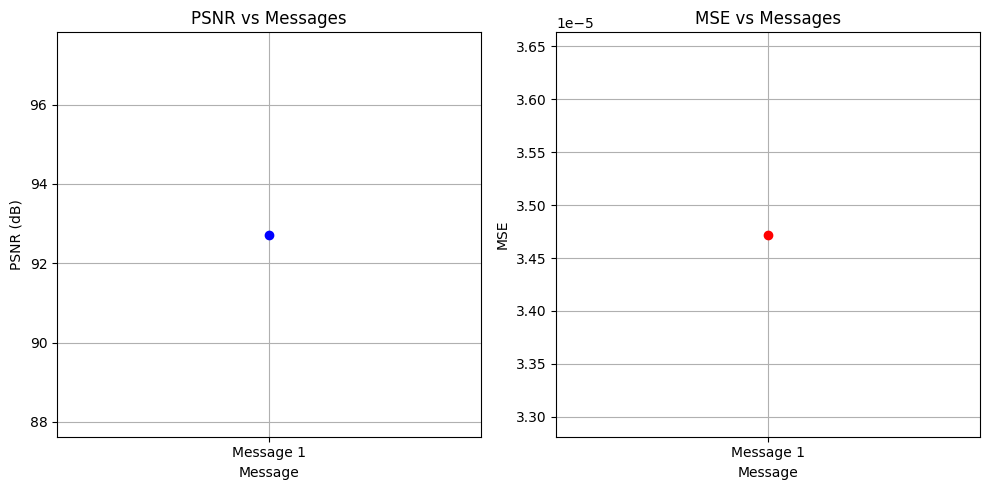

In [ ]:
def calculate_mse(original, modified):
    return np.mean((original - modified) ** 2)

def calculate_psnr(mse, max_pixel=255.0):
    if mse == 0:
        return float('inf')  
    return 20 * math.log10(max_pixel / math.sqrt(mse))

mse_value = calculate_mse(np.array(img.convert("L")), imgArray)
psnr_value = calculate_psnr(mse_value)

print(f"MSE: {mse_value:.4f}")
print(f"PSNR: {psnr_value:.4f} dB")



psnr_values = []
mse_values = []
message_labels = []

originalImgArray = np.array(Image.open("treeBW.png").convert("L"))

mse = calculate_mse(originalImgArray, imgArray)
psnr = calculate_psnr(mse)

mse_values.append(mse)
psnr_values.append(psnr)
message_labels.append("Message 1")

print(f"MSE: {mse:.10f}, PSNR: {psnr:.4f} dB")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(message_labels, psnr_values, marker='o', color='blue')
plt.title('PSNR vs Messages')
plt.xlabel('Message')
plt.ylabel('PSNR (dB)')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(message_labels, mse_values, marker='o', color='red')
plt.title('MSE vs Messages')
plt.xlabel('Message')
plt.ylabel('MSE')
plt.grid(True)

plt.tight_layout()
plt.show()
